<a href="https://colab.research.google.com/github/priya-arun-815/Analysis-of-the-Impact-of-Lombard-Effect-on-Speech-Emotions/blob/main/Impact_of_Lombard_Effect_on_Speech_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os

import glob
import os
import librosa
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.decomposition import PCA


In [ ]:
data, sampling_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['normal', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


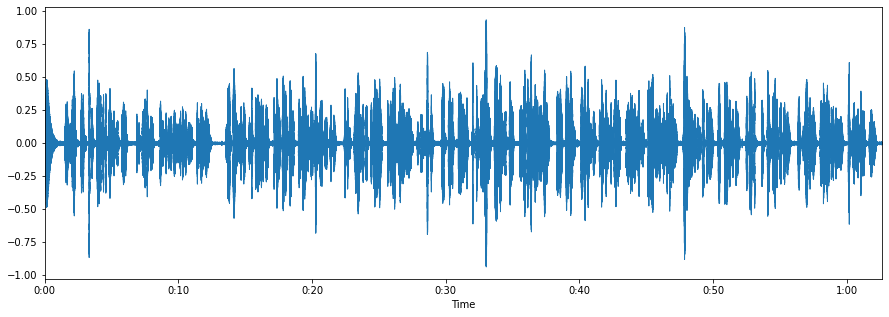

In [ ]:
% pylab inline
import os
import pandas as pd
import librosa
import glob

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

(array([[9.00588695e-05, 2.13139324e-04, 3.64909561e-04, ...,
         5.67216775e-08, 1.28504377e-10, 9.60992018e-08],
        [5.02509528e-05, 1.09821272e-04, 1.86187668e-04, ...,
         9.21503268e-08, 5.22843956e-08, 9.23569500e-08],
        [1.16375765e-07, 2.07574473e-07, 8.46316928e-08, ...,
         2.21335786e-08, 5.23573317e-09, 1.23338982e-08],
        ...,
        [9.10654607e-20, 6.95391098e-21, 5.07534656e-19, ...,
         1.85536236e-23, 1.00910915e-22, 5.51113236e-22],
        [1.89380216e-20, 2.25349811e-19, 2.13552075e-19, ...,
         2.66627084e-23, 5.26655321e-24, 1.29228708e-21],
        [1.99227374e-20, 4.86087439e-20, 3.51895255e-25, ...,
         5.16340382e-24, 1.11791621e-22, 7.60449131e-23]]),
 array([    0.       ,    86.1328125,   172.265625 ,   258.3984375,
          344.53125  ,   430.6640625,   516.796875 ,   602.9296875,
          689.0625   ,   775.1953125,   861.328125 ,   947.4609375,
         1033.59375  ,  1119.7265625,  1205.859375 ,  1291.99

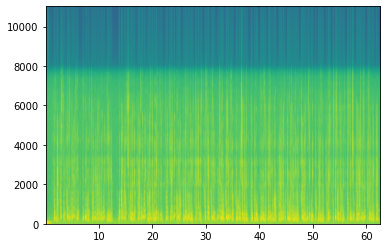

In [ ]:
plt.specgram(data,Fs=sampling_rate)

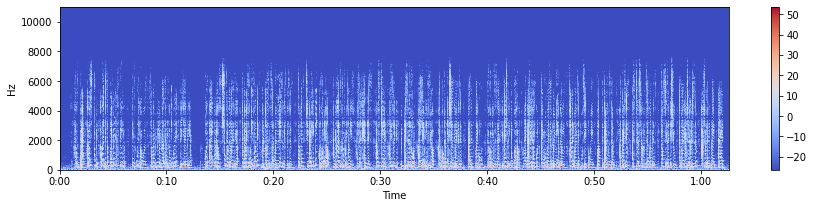

In [ ]:
x, sr = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav')
# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

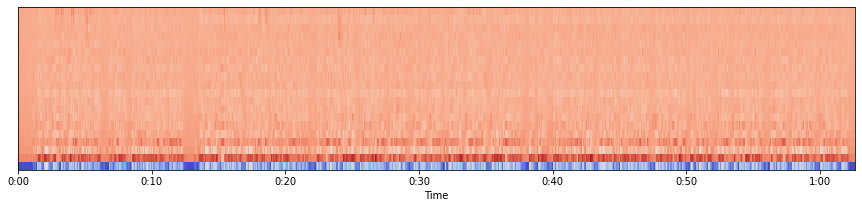

In [ ]:
x, sr = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav')
mfccs = librosa.feature.mfcc(x, sr=sr)
# Displaying  the MFCCs:
plt.figure(figsize=(15, 3))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
!pip install pydub
from pydub import AudioSegment
# Load files
audio_segment = AudioSegment.from_file("/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav")
# Print attributes
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

Channels: 2
Sample width: 2
Frame rate (sample rate): 16000
Frame width: 4
Length (ms): 62633
Frame count: 1002123.0
Intensity: -20.50420899426861


In [ ]:
angry_nm= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry')
happy_nm= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Happy')
neutral_nm= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Neutral')
sad_nm= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Sad')

angry_nm = sorted(angry_nm)
happy_nm = sorted(happy_nm)
neutral_nm = sorted(neutral_nm)
sad_nm = sorted(sad_nm)

In [ ]:
normal_speech = pd.DataFrame({'Angry' : [angry_nm],
                                'Happy' : [happy_nm],
                                'Neutral' : [neutral_nm],
                                'Sad' : [sad_nm], },
                                columns=['Angry','Happy', 'Neutral', 'Sad'])
normal_t = normal_speech.T
split_df = pd.DataFrame(normal_t[0].tolist())

In [ ]:
emotion = ['Angry', 'Happy', 'Neutral', 'Sad'];
split_df['Emotion'] = emotion
normal = split_df
normal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Emotion
0,Anjali_a.wav,Christina_a.wav,Harshana_a.wav,Isha_a.wav,Janice_a.wav,Kathiyayini_a.wav,Lakshanya_a.wav,Mahima_a.wav,Meghana_a.wav,Prithvi_a.wav,Rhea_a.wav,Rinee_a.wav,Rithika_a.wav,Sharan_a.wav,Sharvan_a.wav,Srinidhi_a.wav,Swana_a.wav,Vanathi_a.wav,Vrishin_a.wav,Angry
1,Anjali_h.wav,Christina_h.wav,Harshana_h.wav,Isha_h.wav,Janice_h.wav,Kathiyayini_h.wav,Lakshanya_h.wav,Mahima_h.wav,Meghana_h.wav,Prithvi_h.wav,Rhea_h.wav,Rinee_h.wav,Rithika_h.wav,Sharan_h.wav,Sharvan_h.wav,Srinidhi_h.wav,Swana_h.wav,Vanathi_h.wav,Vrishin_h.wav,Happy
2,Anjali_n.wav,Christina_n.wav,Harshana_n.wav,Isha_n.wav,Janice_n.wav,Kathiyayini_n.wav,Lakshanya_n.wav,Mahima_n.wav,Meghana_n.wav,Prithvi_n.wav,Rhea_n.wav,Rinee_n.wav,Rithika_n.wav,Sharan_n.wav,Sharvan_n.wav,Srinidhi_n.wav,Swana_n.wav,Vanathi_n.wav,Vrishin_n.wav,Neutral
3,Anjali_s.wav,Christina_s.wav,Harshana_s.wav,Isha_s.wav,Janice_s.wav,Kathiyayini_s.wav,Lakshanya_s.wav,Mahima_s.wav,Meghana_s.wav,Prithvi_s.wav,Rhea_s.wav,Rinee_s.wav,Rithika_s.wav,Sharan_s.wav,Sharvan_s.wav,Srinidhi_s.wav,Swana_s.wav,Vanathi_s.wav,Vrishin_s.wav,Sad


**Feature Extraction** for Normal Speech

In [ ]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-2.8277964e-09 -5.6555929e-09  1.1311186e-08 -2.8277964e-09
 -5.6555929e-09 -1.5552880e-08  4.2416946e-09  5.6555929e-09
 -2.8277964e-09  0.0000000e+00  5.6555929e-09  0.0000000e+00
 -1.4138982e-09  5.6555929e-09  5.6555929e-09 -1.1311186e-08
  5.6555929e-09  5.6555929e-09  5.6555929e-09  0.0000000e+00]
[0.9999999 0.9999998 1.0000001 1.        1.        1.0000001 1.
 1.        1.        1.0000002 1.0000001 1.        0.9999999 1.
 1.        1.0000001 1.        0.9999999 1.        1.       ]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


In [ ]:
y, sr = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Anjali_a.wav', sr=None)
mfccs1 = librosa.feature.mfcc(y, sr, hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39)  #window size:20ms  #stide overlap shift:5ms

In [ ]:
mfcc_features = lambda x: np.hamming(mfccs1)

mfcc_features

<function __main__.<lambda>>

In [ ]:
#y1, sr = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/Christina_a.wav', sr=None)
#mfccs2 = librosa.feature.mfcc(y1, sr, hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39)  #window size:20ms  #stide overlap shift:5ms

In [ ]:
#mfccs1 = pd.DataFrame(mfccs1)
#mfccs2 = pd.DataFrame(mfccs2)

#feat = mfccs1.append(mfccs2)
#feat = feat.fillna(0)
#feat


In [ ]:
#mfccs

In [ ]:
mylist_a= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/')
mylist_h= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Happy/')
mylist_s= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Sad/')
mylist_n= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Neutral/')

In [ ]:
#angry
df_a = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_a):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_a = df_a.append(mfccs)


#Happy
df_h = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_h):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Happy/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_h = df_h.append(mfccs)


#Sad
df_s = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_s):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Sad/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_s = df_s.append(mfccs)


 #Neutral
df_n = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_n):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Neutral/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_n = df_n.append(mfccs)



In [ ]:
dfa = df_a.fillna(0)
dfs = df_s.fillna(0)
dfh = df_h.fillna(0)
dfn = df_n.fillna(0)


dfa['Label'] = 'Angry'
dfs['Label'] = 'Sad'
dfh['Label'] = 'Happy'
dfn['Label'] = 'Neutral'

dfa





,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
0,-403.276825,-403.244171,-403.152496,-403.062256,-403.055695,-403.036102,-402.985474,-402.941223,-402.806549,-402.439117,...,-165.703613,-161.750671,-158.274414,-155.258453,-152.937653,-151.273743,-150.187042,-149.571548,-149.308487,Angry
1,56.072845,56.312542,57.028725,58.156258,59.568382,61.018730,62.371536,63.560822,64.433044,64.807373,...,172.965576,173.481903,173.359741,172.682999,171.904510,171.113831,170.386810,169.815826,169.498260,Angry
2,36.677544,36.626793,36.470505,36.165123,35.667603,35.090508,34.484283,33.890240,33.416557,33.216805,...,-29.800903,-28.153585,-26.382988,-24.490484,-22.856686,-21.505512,-20.446016,-19.704473,-19.320137,Angry
3,25.124882,25.242249,25.584015,26.122990,26.802475,27.366838,27.747484,27.976109,27.988029,27.693201,...,23.044254,23.595682,23.967392,24.115725,24.382591,24.745758,25.143921,25.495834,25.706194,Angry
4,26.418760,26.394068,26.297318,26.099728,25.809294,25.607565,25.488297,25.420557,25.380800,25.370014,...,17.203901,17.517466,18.020962,18.759909,19.378319,19.870243,20.249210,20.515415,20.655266,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,4.353560,4.386800,4.485132,4.641391,4.846425,5.088498,5.355836,5.568904,5.735782,5.901639,...,8.370342,8.132992,7.833810,7.516788,7.185429,6.843095,6.427080,6.071669,5.857826,Angry
35,7.919608,7.943953,8.014639,8.121979,8.254404,8.398756,8.542469,8.659184,8.742971,8.794193,...,1.848635,1.582112,1.337888,1.083810,0.813255,0.527019,0.225092,-0.026769,-0.171228,Angry
36,4.765020,4.753181,4.718505,4.660809,4.583386,4.491982,4.394898,4.354220,4.374605,4.435119,...,-0.454813,-0.810066,-1.187194,-1.580154,-1.979168,-2.362974,-2.647197,-2.859740,-2.972073,Angry
37,9.874432,9.828717,9.693796,9.472424,9.170083,8.791872,8.339695,7.896590,7.443267,6.913621,...,5.655015,5.415974,5.088320,4.692727,4.239088,3.755300,3.374012,3.049193,2.854846,Angry


In [ ]:
#angry
#df_a = pd.DataFrame(columns = ['angry_feature'])
#bookmark = 0
#for index,y in enumerate(mylist_a):

 # X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Angry/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  #sample_rate = np.array(sample_rate)
  #mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
 # feature = mfccs
 # df_a.loc[index] = [-(feature/100)]
 # df_a.loc[bookmark] = [feature]
 # bookmark=bookmark+1


#happy
#df_h = pd.DataFrame(columns = ['happy_feature'])
#bookmark = 0
#for index,y in enumerate(mylist_h):

 # X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Happy/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
 # sample_rate = np.array(sample_rate)
 # mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
 # feature = mfccs
 # df_h.loc[index] = [-(feature/100)]
 # df_h.loc[bookmark] = [feature]
 # bookmark=bookmark+1


#sad
#df_s = pd.DataFrame(columns = ['sad_feature'])
#bookmark = 0
#for index,y in enumerate(mylist_s):

 # X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Sad/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
 # sample_rate = np.array(sample_rate)
 # mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
 # feature = mfccs
 # df_s.loc[index] = [-(feature/100)]
 # df_s.loc[bookmark] = [feature]
 # bookmark=bookmark+1


#neutral
#df_n = pd.DataFrame(columns = ['neutral_feature'])
#bookmark = 0
#for index,y in enumerate(mylist_n):

 # X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Normal Speech/Neutral/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
 # sample_rate = np.array(sample_rate)
 # mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc = 39) #n_mfcc=13
 # feature = mfccs
 # df_n.loc[index] = [-(feature/100)]
 # df_n.loc[bookmark] = [feature]
 # bookmark=bookmark+1


In [ ]:
#df_a[:5]

In [ ]:
#df_a['angry_feature'] = df_a['angry_feature'].fillna(0)
#df_a['angry_feature'] = list(numpy.concatenate(df_a['angry_feature']).flat)
#df_a

In [ ]:
#dfa = pd.DataFrame(df_a['angry_feature'].values.flatten())

#dfa = pd.DataFrame(df_a['angry_feature'].values.ravel())
#dfa['Label'] = 'Angry'
#dfa

In [ ]:
#dfs= pd.DataFrame(df_s['sad_feature'].values.tolist())
#dfh = pd.DataFrame(df_h['happy_feature'].values.tolist())
#dfn = pd.DataFrame(df_n['neutral_feature'].values.tolist())

#dfs= pd.DataFrame(df_s['sad_feature'].values.flatten())
#dfh = pd.DataFrame(df_h['happy_feature'].values.flatten())
#dfn = pd.DataFrame(df_n['neutral_feature'].values.flatten())

#dfs['Label'] = 'Sad'
#dfh['Label'] = 'Happy'
#dfn['Label'] = 'Neutral'

In [ ]:
normal_ft = pd.concat([dfa,dfs,dfh, dfn], ignore_index=True)
normal_ft

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
0,-403.276825,-403.244171,-403.152496,-403.062256,-403.055695,-403.036102,-402.985474,-402.941223,-402.806549,-402.439117,...,-165.703613,-161.750671,-158.274414,-155.258453,-152.937653,-151.273743,-150.187042,-149.571548,-149.308487,Angry
1,56.072845,56.312542,57.028725,58.156258,59.568382,61.018730,62.371536,63.560822,64.433044,64.807373,...,172.965576,173.481903,173.359741,172.682999,171.904510,171.113831,170.386810,169.815826,169.498260,Angry
2,36.677544,36.626793,36.470505,36.165123,35.667603,35.090508,34.484283,33.890240,33.416557,33.216805,...,-29.800903,-28.153585,-26.382988,-24.490484,-22.856686,-21.505512,-20.446016,-19.704473,-19.320137,Angry
3,25.124882,25.242249,25.584015,26.122990,26.802475,27.366838,27.747484,27.976109,27.988029,27.693201,...,23.044254,23.595682,23.967392,24.115725,24.382591,24.745758,25.143921,25.495834,25.706194,Angry
4,26.418760,26.394068,26.297318,26.099728,25.809294,25.607565,25.488297,25.420557,25.380800,25.370014,...,17.203901,17.517466,18.020962,18.759909,19.378319,19.870243,20.249210,20.515415,20.655266,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-13.694526,-12.748749,-11.468287,-9.989490,-8.475314,-6.984681,-5.582779,-4.389842,-3.648390,Neutral
2960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.105816,-1.560551,-1.915581,-2.150796,-2.262170,-2.300321,-2.368601,-2.502222,-2.639241,Neutral
2961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.941226,12.991883,11.735976,10.269819,8.732719,7.203977,5.791238,4.661864,4.012926,Neutral
2962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,26.298710,26.146610,25.726501,25.062485,24.302128,23.545557,22.895170,22.438261,22.224182,Neutral


**Feature Extraction** for Lombard Speech

In [ ]:
mylist_la= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Angry/')
mylist_lh= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Happy/')
mylist_ls= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Sad/')
mylist_ln= os.listdir('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Neutral/')

In [ ]:
#Neutral Lombard
df_ln = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_ln):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Neutral/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39 ) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_ln = df_ln.append(mfccs)

#Angry Lombard
df_la = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_la):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Angry/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_la = df_la.append(mfccs)

#Sad Lombard
df_ls = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_ls):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Sad/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_ls = df_ls.append(mfccs)


#Happy Lombard
df_lh = pd.DataFrame()
#bookmark = 0
for index,y in enumerate(mylist_lh):

  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Happy/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
  sample_rate = np.array(sample_rate)
  mfccs = librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39) #n_mfcc=13
  mfccs = pd.DataFrame(mfccs)
  df_lh = df_lh.append(mfccs)



In [ ]:
dfls= df_ls.fillna(0)
dflh = df_lh.fillna(0)
dfln = df_ln.fillna(0)
dfla = df_la.fillna(0)

dfls['Label'] = 'Sad'
dflh['Label'] = 'Happy'
dfln['Label'] = 'Neutral'
dfla['Label'] = 'Angry'

dfla

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
0,-400.061096,-400.084625,-400.164429,-400.343201,-400.688629,-401.258972,-402.035461,-402.695221,-403.284088,-403.689941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
1,63.174828,63.375397,63.957756,64.885147,66.102310,67.560822,69.165680,70.436951,71.349709,71.728073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
2,35.891918,35.814873,35.573944,35.145718,34.516121,33.657009,32.530106,31.513264,30.669954,30.074493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
3,19.174574,19.252899,19.476780,19.840605,20.362806,21.056795,21.963428,22.732784,23.302021,23.676664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
4,25.779230,25.731903,25.580812,25.312157,24.915287,24.380573,23.693829,23.217045,22.952423,22.795952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0.028180,0.094883,0.279129,0.542713,0.841572,1.136261,1.396310,1.593291,1.685370,1.727074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
35,-0.623709,-0.580580,-0.462736,-0.298412,-0.118759,0.051773,0.196845,0.324198,0.484902,0.631741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
36,1.788088,1.781023,1.756984,1.709499,1.634720,1.534969,1.415197,1.267469,1.039590,0.786882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
37,4.878688,4.869829,4.841250,4.786894,4.699052,4.568871,4.385491,4.156898,3.939983,3.709342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry


In [ ]:
#Neutral Lombard
#df_ln = pd.DataFrame(columns = ['neutral_lombard'])
#bookmark = 0
##for index,y in enumerate(mylist_ln):

 # X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Neutral/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
 # sample_rate = np.array(sample_rate)
 # mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39 ), axis = 0) #n_mfcc=13
 # feature = mfccs
 # df_ln.loc[index] = [-(feature/100)]
 # df_ln.loc[bookmark] = [feature]
 # bookmark=bookmark+1


#Angry Lombard
#df_la = pd.DataFrame(columns = ['angry_lombard'])
#bookmark = 0
#for index,y in enumerate(mylist_la):

#  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Angry/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
#  sample_rate = np.array(sample_rate)
#  mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39), axis = 0) #n_mfcc=13
#  feature = mfccs
#  df_la.loc[index] = [-(feature/100)]
#  df_la.loc[bookmark] = [feature]
#  bookmark=bookmark+1


#Sad Lombard
#df_ls = pd.DataFrame(columns = ['sad_lombard'])
#bookmark = 0
#for index,y in enumerate(mylist_ls):

#  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Sad/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
#  sample_rate = np.array(sample_rate)
#  mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39), axis = 0) #n_mfcc=13
#  feature = mfccs
#  df_ls.loc[index] = [-(feature/100)]
#  df_ls.loc[bookmark] = [feature]
#  bookmark=bookmark+1


#Happy Lombard
#df_lh = pd.DataFrame(columns = ['happy_lombard'])
#bookmark = 0
#for index,y in enumerate(mylist_lh):

#  X, sample_rate = librosa.load('/content/drive/My Drive/FYP/Speech Dataset/Lombard Speech/Happy/' +y, res_type='kaiser_fast', duration=60, offset = 0.5) #duration=2.5,sr=22050*2
#  sample_rate = np.array(sample_rate)
#  mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,   hop_length=int(sr/200), n_fft=int(sr/5), n_mfcc=39), axis = 0) #n_mfcc=13
#  feature = mfccs
#  df_lh.loc[index] = [-(feature/100)]
#  df_lh.loc[bookmark] = [feature]
#  bookmark=bookmark+1



In [ ]:
#dfls= pd.DataFrame(df_ls['sad_lombard'].values.tolist())
#dflh = pd.DataFrame(df_lh['happy_lombard'].values.tolist())
#dfln = pd.DataFrame(df_ln['neutral_lombard'].values.tolist())
#dfla = pd.DataFrame(df_la['angry_lombard'].values.tolist())

#dfls['Label'] = 'Sad'
#dflh['Label'] = 'Happy'
#dfln['Label'] = 'Neutral'
#dfla['Label'] = 'Angry'

In [ ]:
lombard_ft = pd.concat([dfla,dfls,dflh, dfln], ignore_index=True)
lombard_ft

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
0,-400.061096,-400.084625,-400.164429,-400.343201,-400.688629,-401.258972,-402.035461,-402.695221,-403.284088,-403.689941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
1,63.174828,63.375397,63.957756,64.885147,66.102310,67.560822,69.165680,70.436951,71.349709,71.728073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
2,35.891918,35.814873,35.573944,35.145718,34.516121,33.657009,32.530106,31.513264,30.669954,30.074493,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
3,19.174574,19.252899,19.476780,19.840605,20.362806,21.056795,21.963428,22.732784,23.302021,23.676664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
4,25.779230,25.731903,25.580812,25.312157,24.915287,24.380573,23.693829,23.217045,22.952423,22.795952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2803,0.977497,1.043378,1.233535,1.528473,1.903965,2.334418,2.792244,3.247324,3.668213,4.020641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
2804,2.115984,2.093516,2.029860,1.936330,1.830095,1.729757,1.651340,1.605943,1.600036,1.632869,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
2805,-1.037612,-0.983986,-0.833854,-0.610973,-0.339203,-0.035592,0.291401,0.638596,1.003978,1.380863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral
2806,-1.983256,-1.908821,-1.699662,-1.389237,-1.015387,-0.610096,-0.195407,0.213560,0.605423,0.969316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Neutral


In [ ]:
from sklearn.utils import shuffle
rnormal_ft = shuffle(normal_ft)
rlombard_ft = shuffle(lombard_ft)


rnormal_ft = rnormal_ft.fillna(0)
rlombard_ft = rlombard_ft.fillna(0)
#rnormal_ft  = np.asarray(rnormal_ft)
rnormal_ft

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
1560,-477.263184,-477.263184,-477.263184,-477.263184,-477.263184,-477.263184,-477.263184,-477.263184,-477.263184,-477.263184,...,-128.506638,-129.516434,-130.982254,-132.897202,-135.205353,-137.780365,-140.366959,-142.580856,-143.908707,Happy
2669,0.025756,0.025750,0.025727,0.025669,0.025544,0.025320,0.024954,0.024410,0.023674,0.011332,...,-9.788015,-8.646995,-7.289564,-5.832606,-4.552664,-3.537682,-2.699245,-2.047180,-1.711943,Neutral
387,6.688659,6.675311,6.641194,6.618908,6.525445,6.333405,6.011251,5.791374,5.469337,5.222201,...,12.663504,13.089031,13.547077,13.984930,14.373290,14.663071,14.824608,14.881165,14.871813,Angry
2679,-0.159041,-0.159002,-0.158861,-0.158501,-0.157732,-0.156348,-0.154085,-0.150726,-0.146182,-0.137585,...,-2.991754,-2.403227,-2.087541,-1.893629,-1.538869,-1.023182,-0.693167,-0.630634,-0.652763,Neutral
148,4.586123,4.624063,4.731606,4.860552,5.029799,5.210135,5.388728,5.562357,5.660847,5.675485,...,0.726469,0.577393,0.472639,0.397132,0.359396,0.361140,0.393208,0.432251,0.454340,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,25.184633,25.152592,25.061249,24.923782,24.754482,24.557751,24.308725,23.977200,23.528507,23.043579,...,18.201441,18.110531,17.860802,17.575184,17.235916,16.897366,16.585348,16.342772,16.215658,Happy
2190,7.392047,8.800591,9.006986,9.391724,8.554501,9.611373,10.432543,10.404744,10.167957,9.818174,...,9.297981,10.377239,11.652945,13.206135,14.689135,16.003792,17.092842,17.883228,18.300188,Happy
2238,9.978324,9.971127,9.949527,9.913250,9.862265,9.797499,9.721378,9.635286,9.540031,9.436522,...,7.750068,7.257179,6.741103,6.214520,5.691712,5.193098,4.748946,4.405107,4.215069,Neutral
447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-16.459482,-15.966570,-15.465987,-14.950455,-14.411667,-13.848448,-13.281891,-12.778599,-12.465288,Angry


In [ ]:
rlombard_ft

,0,1,2,3,4,5,6,7,8,9,...,16529,16530,16531,16532,16533,16534,16535,16536,16537,Label
1718,26.325893,26.422916,26.692459,27.078539,27.524878,27.977661,28.393513,28.748146,29.035408,29.231838,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Happy
1635,4.260017,4.282351,4.335156,3.866618,2.675557,1.671198,1.288511,1.218356,0.972896,0.298369,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Happy
1363,-6.884910,-6.761547,-6.456944,-6.031373,-5.471905,-4.786029,-4.041482,-3.318701,-2.676377,-2.152977,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Sad
2012,2.000933,1.996516,1.981894,1.957143,1.926221,1.899643,1.908553,1.963384,2.128531,2.259351,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Happy
650,5.449008,5.499784,5.644104,5.855647,6.099277,6.344535,6.574172,6.851423,6.892748,7.023635,...,19.080589,17.74889,16.483549,15.372667,14.439698,13.67602,13.091289,12.672709,12.458822,Angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,18.386501,18.321434,18.130600,17.826832,17.426773,16.944904,16.391052,15.772923,15.091904,14.349460,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Sad
536,-8.894530,-8.926964,-9.025417,-9.217545,-9.511450,-9.891039,-10.289136,-10.704569,-11.152464,-11.641487,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Angry
1741,-4.225554,-4.254420,-4.333420,-4.426140,-4.494393,-4.520841,-4.510489,-4.481524,-4.449915,-4.425924,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Happy
2161,-16.990009,-16.992823,-16.971153,-16.821686,-16.557316,-16.234062,-15.910764,-15.681299,-15.624491,-15.770132,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,Neutral


**Splitting dataset into test ad train**

In [ ]:
newdf1 = np.random.rand(len(rnormal_ft)) < 0.7
train = rnormal_ft[newdf1]
test = rnormal_ft[~newdf1]

In [ ]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

#trainfeatures = train[:, :-1]
#trainlabel = train[:, -1:]
#testfeatures = test[:, :-1]
#testlabel = test[:, -1:]


In [ ]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train.shape

(2057, 4)

In [ ]:
X_train.shape

(2057, 16538)

**Building classifier with CNN** - Conv1D

In [ ]:


x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)


#x_traincnn = np.array([np.array(val) for val in x_traincnn])
#x_testcnn = np.array([np.array(val) for val in x_testcnn])


In [ ]:
#x_traincnn = np.asarray(x_traincnn)
#x_testcnn = np.asarray(x_testcnn)

In [ ]:
#from keras.models import Sequential
#from keras.layers import Dense, Conv2D, Flatten
#from tensorflow.keras.layers import BatchNormalization
#create model
#model = Sequential()

#Input Layer
#model.add(Conv2D(32, 5,strides=2,padding='same',
#                 input_shape=(13,216,1)))
#model.add(Activation('relu'))
#model.add(BatchNormalization())

#Hidden Layer 1
#model.add(Conv2D(64, 5,strides=2,padding='same',))
#model.add(Activation('relu'))
#model.add(BatchNormalization())

#Hidden Layer 2
#model.add(Conv2D(64, 5,strides=2,padding='same',))
#model.add(Activation('relu'))
#model.add(BatchNormalization())

#Flatten Conv Net
#model.add(Flatten())

#Output Layer
#model.add(Dense(7))
#model.add(Activation('softmax'))

In [ ]:
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(16538,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))
#opt = optimizers.RMSprop(lr=0.00001, decay=0.0)
opt = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16538, 256)        1536      
                                                                 
 activation (Activation)     (None, 16538, 256)        0         
                                                                 
 conv1d_1 (Conv1D)           (None, 16538, 128)        163968    
                                                                 
 activation_1 (Activation)   (None, 16538, 128)        0         
                                                                 
 dropout (Dropout)           (None, 16538, 128)        0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2067, 128)        0         
 )                                                               
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

**Removed the whole training part for avoiding unnecessary long epochs list**

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=10, epochs=10, validation_data=(x_testcnn, y_test))

Epoch 1/10
206/206 [==============================] - 1057s 5s/step - loss: 3.4430 - accuracy: 0.2572 - val_loss: 1.3852 - val_accuracy: 0.3484
Epoch 2/10
206/206 [==============================] - 1069s 5s/step - loss: 1.3086 - accuracy: 0.3826 - val_loss: 0.7177 - val_accuracy: 0.7475
Epoch 3/10
206/206 [==============================] - 1067s 5s/step - loss: 0.4536 - accuracy: 0.8687 - val_loss: 0.1617 - val_accuracy: 0.9548
Epoch 4/10
206/206 [==============================] - 1061s 5s/step - loss: 0.2973 - accuracy: 0.9334 - val_loss: 0.1011 - val_accuracy: 0.9691
Epoch 5/10
206/206 [==============================] - 1054s 5s/step - loss: 0.0634 - accuracy: 0.9708 - val_loss: 0.1007 - val_accuracy: 0.9835
Epoch 6/10
206/206 [==============================] - 1045s 5s/step - loss: 0.0815 - accuracy: 0.9728 - val_loss: 0.0654 - val_accuracy: 0.9824
Epoch 7/10
206/206 [==============================] - 1047s 5s/step - loss: 0.0424 - accuracy: 0.9767 - val_loss: 0.0683 - val_accuracy:

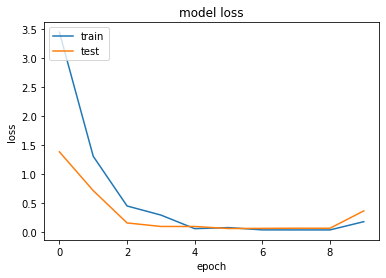

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Saving the model**

In [ ]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

**Loading the model**

In [ ]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 89.64%


In [ ]:
#add lombard dataset
test_lm = rlombard_ft

testfeatures_lm = test_lm.iloc[:, :-1]
testlabel_lm = test_lm.iloc[:, -1:]

X_test_lm = np.array(testfeatures_lm)
y_test_lm = np.array(testlabel_lm)

y_test_lm = np_utils.to_categorical(lb.fit_transform(y_test_lm))

x_testcnn_lm= np.expand_dims(X_test_lm, axis=2)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score1 = loaded_model.evaluate(x_testcnn_lm, y_test_lm, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score1[1]*100))

accuracy: 22.83%


In [ ]:
print("%s of Normal Speech: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
print("%s of Lombard speech: %.2f%%" % (loaded_model.metrics_names[1], score1[1]*100))


accuracy of Normal Speech: 89.64%
accuracy of Lombard speech: 22.83%


**CLASSIFIERS**

**Random Forest Classifier**

In [ ]:
#Train test split
x = rnormal_ft.drop(["Label"],axis=1)
y = rnormal_ft["Label"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,shuffle=True,test_size=0.3)

In [ ]:
rfclassifier = RandomForestClassifier(n_estimators=300)
rfclassifier.fit(xtrain,ytrain)
rfy_pred = rfclassifier.predict(xtest)

In [ ]:
print(confusion_matrix(ytest, rfy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, rfy_pred))
print(accuracy_score(ytest,rfy_pred))

[[156  16  21  40]
 [ 14 168  14  25]
 [ 26  20 162  27]
 [ 16  28   9 148]]
              precision    recall  f1-score   support

       Angry       0.79      0.69      0.73       235
       Happy       0.74      0.67      0.70       233
     Neutral       0.62      0.74      0.67       201
         Sad       0.72      0.76      0.74       221

    accuracy                           0.71       890
   macro avg       0.72      0.71      0.71       890
weighted avg       0.72      0.71      0.71       890

0.7123595505617978


In [ ]:
train = rnormal_ft
test = rlombard_ft

trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [ ]:
#lombard
rfclassifier = RandomForestClassifier(n_estimators=300)
rfclassifier.fit(trainfeatures,trainlabel)
rfy_pred = rfclassifier.predict(testfeatures)

print(confusion_matrix(testlabel, rfy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, rfy_pred))
print(accuracy_score(testlabel,rfy_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[280  82 230 149]
 [199 216 148 178]
 [244 111 243 143]
 [180 104 166 291]]
              precision    recall  f1-score   support

       Angry       0.31      0.33      0.32       741
       Happy       0.31      0.38      0.34       741
     Neutral       0.38      0.39      0.39       741
         Sad       0.42      0.29      0.34       741

    accuracy                           0.35      2964
   macro avg       0.36      0.35      0.35      2964
weighted avg       0.36      0.35      0.35      2964

0.3475033738191633


**Support Vector**

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(xtrain,ytrain)


SVC(kernel='linear')

In [ ]:
svc_pred = svc_classifier.predict(xtest)

print(confusion_matrix(ytest, svc_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, svc_pred))
print(accuracy_score(ytest,svc_pred))

[[55 46 73 42]
 [49 65 83 37]
 [59 51 75 49]
 [50 41 54 61]]
              precision    recall  f1-score   support

       Angry       0.26      0.32      0.29       234
       Happy       0.26      0.25      0.26       216
     Neutral       0.32      0.30      0.31       206
         Sad       0.32      0.28      0.30       234

    accuracy                           0.29       890
   macro avg       0.29      0.29      0.29       890
weighted avg       0.29      0.29      0.29       890

0.2876404494382023


In [ ]:
#lombard
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(trainfeatures,trainlabel)
svc_pred = svc_classifier.predict(testfeatures)

print(confusion_matrix(testlabel, svc_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, svc_pred))
print(accuracy_score(testlabel,svc_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[199 132 266 144]
 [209 135 248 149]
 [223 110 249 159]
 [172 124 249 196]]
              precision    recall  f1-score   support

       Angry       0.25      0.34      0.28       741
       Happy       0.25      0.27      0.26       741
     Neutral       0.30      0.26      0.28       741
         Sad       0.27      0.18      0.22       741

    accuracy                           0.26      2964
   macro avg       0.27      0.26      0.26      2964
weighted avg       0.27      0.26      0.26      2964

0.26282051282051283


**MLP**

In [ ]:

from sklearn.neural_network import MLPClassifier
mlp_model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
mlp_model.fit(xtrain,ytrain)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
y_pred=mlp_model.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score
#y_pred = (y_pred > 0.5)
accuracy=accuracy_score(y_true=ytest, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 27.87%


In [ ]:
#lombard

from sklearn.neural_network import MLPClassifier
mlp_model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

mlp_model.fit(trainfeatures,trainlabel)
y_pred=mlp_model.predict(testfeatures)

from sklearn.metrics import accuracy_score
#y_pred = (y_pred > 0.5)
accuracy=accuracy_score(y_true=testlabel, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 27.43%


In [ ]:
#accuracy =accuracy_score(ytest,rfy_pred)
#accuracy_lm=accuracy_score(testlabel,rfy_pred)

#print("Accuracy of Normal Speech: {:.2f}%".format(accuracy*100))
#print("Accuracy of Lombard Speech: {:.2f}%".format(accuracy_lm*100))

**KNN Classifier**

In [ ]:
x = rnormal_ft.drop(["Label"],axis=1)
y = rnormal_ft["Label"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,shuffle=True,test_size=0.3)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred  = classifier.predict(xtest)

print(confusion_matrix(ytest, y_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, y_pred))
print(accuracy_score(ytest,y_pred))

[[ 68  30  10 107]
 [  1 134   2  94]
 [  1  44  82 104]
 [  2  13   1 197]]
              precision    recall  f1-score   support

       Angry       0.86      0.35      0.50       231
       Happy       0.94      0.32      0.47       215
     Neutral       0.39      0.92      0.55       213
         Sad       0.61      0.58      0.59       231

    accuracy                           0.54       890
   macro avg       0.70      0.54      0.53       890
weighted avg       0.70      0.54      0.53       890

0.5404494382022472


In [ ]:
#lombard
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(trainfeatures,trainlabel)

y_pred  = classifier.predict(testfeatures)
result = confusion_matrix(testlabel, y_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral'])
print("Confusion Matrix:")
print(result)
result1 = classification_report(testlabel, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(testlabel,y_pred)
print("Accuracy:",result2)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Matrix:
[[ 14 142  22 563]
 [  3 164  13 561]
 [ 10 136  22 573]
 [  9 103  17 612]]
Classification Report:
              precision    recall  f1-score   support

       Angry       0.30      0.03      0.05       741
       Happy       0.39      0.02      0.04       741
     Neutral       0.27      0.83      0.40       741
         Sad       0.30      0.22      0.26       741

    accuracy                           0.27      2964
   macro avg       0.31      0.27      0.19      2964
weighted avg       0.31      0.27      0.19      2964

Accuracy: 0.2739541160593792


**XGB Classifier**

In [ ]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(xtrain,ytrain)
xgby_pred = xgb_model.predict(xtest)
print(confusion_matrix(ytest, xgby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, xgby_pred))
print(accuracy_score(ytest,xgby_pred))

[[137  19  30  29]
 [ 20 161  23  27]
 [ 26  30 150  25]
 [ 23  30  24 136]]
              precision    recall  f1-score   support

       Angry       0.66      0.65      0.66       231
       Happy       0.67      0.64      0.65       215
     Neutral       0.63      0.64      0.63       213
         Sad       0.67      0.70      0.68       231

    accuracy                           0.66       890
   macro avg       0.66      0.66      0.66       890
weighted avg       0.66      0.66      0.66       890

0.6561797752808989


In [ ]:
#lombard
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(trainfeatures,trainlabel)
xgby_pred = xgb_model.predict(testfeatures)
print(confusion_matrix(testlabel, xgby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, xgby_pred))
print(accuracy_score(testlabel,xgby_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[237 121 212 171]
 [235 210 117 179]
 [218 145 228 150]
 [185 113 158 285]]
              precision    recall  f1-score   support

       Angry       0.32      0.31      0.31       741
       Happy       0.27      0.32      0.29       741
     Neutral       0.36      0.38      0.37       741
         Sad       0.36      0.28      0.32       741

    accuracy                           0.32      2964
   macro avg       0.33      0.32      0.32      2964
weighted avg       0.33      0.32      0.32      2964

0.32388663967611336


**GradientBoostingClassifier**

In [ ]:
gbclassifier = GradientBoostingClassifier(n_estimators=100)
gbclassifier.fit(xtrain,ytrain)
gby_pred = gbclassifier.predict(xtest)
print(confusion_matrix(ytest, gby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, gby_pred))
print(accuracy_score(ytest,gby_pred))

[[146  15  33  21]
 [ 20 163  27  21]
 [ 30  21 156  24]
 [ 23  22  26 142]]
              precision    recall  f1-score   support

       Angry       0.64      0.68      0.66       231
       Happy       0.67      0.68      0.67       215
     Neutral       0.68      0.67      0.67       213
         Sad       0.74      0.71      0.72       231

    accuracy                           0.68       890
   macro avg       0.68      0.68      0.68       890
weighted avg       0.68      0.68      0.68       890

0.6820224719101123


In [ ]:
#lombard
gbclassifier = GradientBoostingClassifier(n_estimators=100)
gbclassifier.fit(trainfeatures,trainlabel)
gby_pred = gbclassifier.predict(testfeatures)
print(confusion_matrix(testlabel, gby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, gby_pred))
print(accuracy_score(testlabel,gby_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[227 105 220 189]
 [220 214 117 190]
 [216 143 212 170]
 [170  91 161 319]]
              precision    recall  f1-score   support

       Angry       0.30      0.29      0.29       741
       Happy       0.27      0.31      0.29       741
     Neutral       0.37      0.43      0.40       741
         Sad       0.39      0.29      0.33       741

    accuracy                           0.33      2964
   macro avg       0.33      0.33      0.33      2964
weighted avg       0.33      0.33      0.33      2964

0.32793522267206476


**DecisionTreeClassifier**

In [ ]:
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(xtrain,ytrain)
dty_pred = dtclassifier.predict(xtest)
print(confusion_matrix(ytest, dty_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, dty_pred))
print(accuracy_score(ytest,dty_pred))

[[65 61 50 55]
 [35 85 48 52]
 [37 51 72 49]
 [47 57 40 86]]
              precision    recall  f1-score   support

       Angry       0.34      0.34      0.34       209
       Happy       0.35      0.28      0.31       231
     Neutral       0.36      0.37      0.36       230
         Sad       0.33      0.39      0.36       220

    accuracy                           0.35       890
   macro avg       0.35      0.35      0.34       890
weighted avg       0.35      0.35      0.34       890

0.34606741573033706


In [ ]:
#lombard
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(trainfeatures,trainlabel)
dty_pred = dtclassifier.predict(testfeatures)
print(confusion_matrix(testlabel, dty_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, dty_pred))
print(accuracy_score(testlabel,dty_pred))

[[184 171 177 209]
 [212 173 166 190]
 [208 146 183 204]
 [169 180 155 237]]
              precision    recall  f1-score   support

       Angry       0.27      0.25      0.26       741
       Happy       0.24      0.25      0.24       741
     Neutral       0.28      0.32      0.30       741
         Sad       0.26      0.23      0.25       741

    accuracy                           0.26      2964
   macro avg       0.26      0.26      0.26      2964
weighted avg       0.26      0.26      0.26      2964

0.26214574898785425


**BaggingClassifier**

In [ ]:
bcclassifier = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bcclassifier.fit(xtrain,ytrain)
bcy_pred = bcclassifier.predict(xtest)
print(confusion_matrix(ytest, bcy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, bcy_pred))
print(accuracy_score(ytest,bcy_pred))

[[ 16  74   1 140]
 [  2 147   1  70]
 [ 10  60  21 118]
 [  2  44   3 181]]
              precision    recall  f1-score   support

       Angry       0.81      0.10      0.18       209
       Happy       0.53      0.07      0.12       231
     Neutral       0.36      0.79      0.49       230
         Sad       0.45      0.67      0.54       220

    accuracy                           0.41       890
   macro avg       0.54      0.41      0.33       890
weighted avg       0.53      0.41      0.33       890

0.4101123595505618


In [ ]:
#lombard
bcclassifier = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bcclassifier.fit(trainfeatures,trainlabel)
bcy_pred = bcclassifier.predict(testfeatures)
print(confusion_matrix(testlabel, bcy_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, bcy_pred))
print(accuracy_score(testlabel,bcy_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 20 318   8 395]
 [  7 337   7 390]
 [ 17 277  10 437]
 [ 10 265   8 458]]
              precision    recall  f1-score   support

       Angry       0.30      0.01      0.03       741
       Happy       0.37      0.03      0.05       741
     Neutral       0.27      0.62      0.38       741
         Sad       0.28      0.45      0.35       741

    accuracy                           0.28      2964
   macro avg       0.31      0.28      0.20      2964
weighted avg       0.31      0.28      0.20      2964

0.2783400809716599


**AdaBoostClassifier**

In [ ]:
abclassifier = AdaBoostClassifier(n_estimators=100)
abclassifier.fit(xtrain,ytrain)
aby_pred = abclassifier.predict(xtest)
print(confusion_matrix(ytest, aby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(ytest, aby_pred))
print(accuracy_score(ytest,aby_pred))

[[107  23  41  60]
 [ 33 112  41  34]
 [ 30  34  92  53]
 [ 32  38  45 115]]
              precision    recall  f1-score   support

       Angry       0.42      0.44      0.43       209
       Happy       0.53      0.46      0.49       231
     Neutral       0.44      0.50      0.47       230
         Sad       0.54      0.51      0.52       220

    accuracy                           0.48       890
   macro avg       0.48      0.48      0.48       890
weighted avg       0.48      0.48      0.48       890

0.4786516853932584


In [ ]:
#lombard
abclassifier = AdaBoostClassifier(n_estimators=100)
abclassifier.fit(trainfeatures,trainlabel)
aby_pred = abclassifier.predict(testfeatures)
print(confusion_matrix(testlabel, aby_pred,labels = ['Happy', 'Sad', 'Angry', 'Neutral']))
print(classification_report(testlabel, aby_pred))
print(accuracy_score(testlabel,aby_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[227 127 192 195]
 [233 187 142 179]
 [225 150 184 182]
 [229 108 161 243]]
              precision    recall  f1-score   support

       Angry       0.27      0.25      0.26       741
       Happy       0.25      0.31      0.27       741
     Neutral       0.30      0.33      0.32       741
         Sad       0.33      0.25      0.28       741

    accuracy                           0.28      2964
   macro avg       0.29      0.28      0.28      2964
weighted avg       0.29      0.28      0.28      2964

0.28373819163292846
